In [1]:
import numpy as np
import pandas as pd
# pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt

**Reading data into memory and creating a Pandas DataFrame object**

(This may take a while, be patient)

We are not going to read in the whole dataset. In order to reduce memory footprint, we instead load only needed columns and cast them to suitable data types.

In [2]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 
         'Cancelled': np.uint8, 'Year': np.uint16, 'FlightNum': np.uint16 , 
         'Distance': np.uint16, 'UniqueCarrier': str, 'CancellationCode': str, 
         'Origin': str, 'Dest': str, 'ArrDelay': np.float16, 
         'DepDelay': np.float16, 'CarrierDelay': np.float16, 
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 
         'SecurityDelay': np.float16, 'LateAircraftDelay': np.float16, 
         'DepTime': np.float16}

In [3]:
%%time
# change the path if needed
path = '2008.csv.bz2'
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)


CPU times: user 1min 55s, sys: 1.6 s, total: 1min 57s
Wall time: 1min 59s


**Check the number of rows and columns and print column names.**


In [4]:
print(flights_df.shape)
print(flights_df.columns)


(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


**Print first 5 rows of the dataset.**

In [5]:
flights_df.head()

Year  Month  DayofMonth  DayOfWeek  DepTime UniqueCarrier  FlightNum  \
0  2008      1           3          4   2003.0            WN        335   
1  2008      1           3          4    754.0            WN       3231   
2  2008      1           3          4    628.0            WN        448   
3  2008      1           3          4    926.0            WN       1746   
4  2008      1           3          4   1829.0            WN       3920   

   ArrDelay  DepDelay Origin Dest  Distance  Cancelled CancellationCode  \
0     -14.0       8.0    IAD  TPA       810          0              NaN   
1       2.0      19.0    IAD  TPA       810          0              NaN   
2      14.0       8.0    IND  BWI       515          0              NaN   
3      -6.0      -4.0    IND  BWI       515          0              NaN   
4      34.0      34.0    IND  BWI       515          0              NaN   

   CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  
0           NaN           NaN       NaN            NaN                NaN  
1           NaN           NaN       NaN            NaN                NaN  
2           NaN           NaN       NaN            NaN                NaN  
3           NaN           NaN       NaN            NaN                NaN  
4           2.0           0.0       0.0            0.0               32.0

**Transpose the frame to see all features at once.**

In [6]:
flights_df.head().T

0     1     2     3     4
Year               2008  2008  2008  2008  2008
Month                 1     1     1     1     1
DayofMonth            3     3     3     3     3
DayOfWeek             4     4     4     4     4
DepTime            2003   754   628   926  1829
UniqueCarrier        WN    WN    WN    WN    WN
FlightNum           335  3231   448  1746  3920
ArrDelay            -14     2    14    -6    34
DepDelay              8    19     8    -4    34
Origin              IAD   IAD   IND   IND   IND
Dest                TPA   TPA   BWI   BWI   BWI
Distance            810   810   515   515   515
Cancelled             0     0     0     0     0
CancellationCode    NaN   NaN   NaN   NaN   NaN
CarrierDelay        NaN   NaN   NaN   NaN     2
WeatherDelay        NaN   NaN   NaN   NaN     0
NASDelay            NaN   NaN   NaN   NaN     0
SecurityDelay       NaN   NaN   NaN   NaN     0
LateAircraftDelay   NaN   NaN   NaN   NaN    32

**Examine data types of all features and total dataframe size in memory.**

In [8]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 19 columns):
Year                 uint16
Month                uint8
DayofMonth           uint8
DayOfWeek            uint8
DepTime              float16
UniqueCarrier        object
FlightNum            uint16
ArrDelay             float16
DepDelay             float16
Origin               object
Dest                 object
Distance             uint16
Cancelled            uint8
CancellationCode     object
CarrierDelay         float16
WeatherDelay         float16
NASDelay             float16
SecurityDelay        float16
LateAircraftDelay    float16
dtypes: float16(8), object(4), uint16(3), uint8(4)
memory usage: 387.7+ MB


**First glance to know if the dataframe has nan values**

In [10]:
flights_df.isnull().values.any()

True

**Get basic statistics of each feature.**


In [11]:
flights_df.describe().T

count         mean          std     min     25%  \
Year               7009728.0  2008.000000     0.000000  2008.0  2008.0   
Month              7009728.0     6.375130     3.406737     1.0     3.0   
DayofMonth         7009728.0    15.728015     8.797068     1.0     8.0   
DayOfWeek          7009728.0     3.924182     1.988259     1.0     2.0   
DepTime            6873482.0          NaN          NaN     1.0   928.0   
FlightNum          7009728.0  2224.200105  1961.715999     1.0   622.0   
ArrDelay           6855029.0          NaN          NaN  -519.0   -10.0   
DepDelay           6873482.0          NaN          NaN  -534.0    -4.0   
Distance           7009728.0   726.387029   562.101803    11.0   325.0   
Cancelled          7009728.0     0.019606     0.138643     0.0     0.0   
CarrierDelay       1524735.0          NaN          NaN     0.0     0.0   
WeatherDelay       1524735.0          NaN          NaN     0.0     0.0   
NASDelay           1524735.0          NaN          NaN     0.0     0.0   
SecurityDelay      1524735.0          NaN          NaN     0.0     0.0   
LateAircraftDelay  1524735.0          NaN          NaN     0.0     0.0   

                      50%     75%     max  
Year               2008.0  2008.0  2008.0  
Month                 6.0     9.0    12.0  
DayofMonth           16.0    23.0    31.0  
DayOfWeek             4.0     6.0     7.0  
DepTime            1325.0  1728.0  2400.0  
FlightNum          1571.0  3518.0  9743.0  
ArrDelay             -2.0    12.0  2460.0  
DepDelay             -1.0     8.0  2468.0  
Distance            581.0   954.0  4962.0  
Cancelled             0.0     0.0     1.0  
CarrierDelay          0.0    16.0  2436.0  
WeatherDelay          0.0     0.0  1352.0  
NASDelay              6.0    21.0  1357.0  
SecurityDelay         0.0     0.0   392.0  
LateAircraftDelay     0.0    26.0  1316.0

**Count unique Carriers and plot their relative share of flights:**


In [6]:
flights_df['UniqueCarrier'].nunique()

20

In [8]:
flights_df['UniqueCarrier'].value_counts()

WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
EV     280575
9E     262208
FL     261684
YV     254930
OH     197607
B6     196091
AS     151102
F9      95762
HA      61826
AQ       7800
Name: UniqueCarrier, dtype: int64

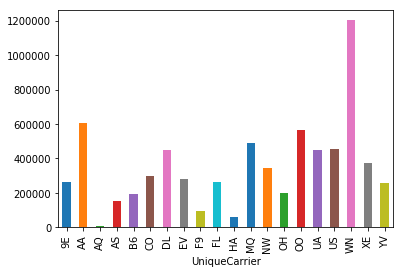

In [9]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar');

**We can also group by category/categories in order to calculate different aggregated statistics.**

**For example, finding top-3 flight codes, that have the largest total distance traveled in year 2008.**


In [10]:
flights_df.groupby(['UniqueCarrier','FlightNum'])['Distance'].sum().sort_values(
    ascending=False).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244.0
               14           1796244.0
UA             52           1789722.0
Name: Distance, dtype: float64

**Another way:**


In [18]:
flights_df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Distance                  Cancelled
                                mean        sum count       sum
UniqueCarrier FlightNum                                        
CO            15         4962.000000  1796244.0   362         0
              14         4962.000000  1796244.0   362         0
UA            52         2465.181818  1789722.0   726         8

**Number of flights by days of week and months:**

In [14]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek       1       2       3       4       5      6      7
Month                                                          
1           80807   97298  100080  102043   81940  67178  76419
2           81504   79700   80587   82158  102726  66462  76099
3          103210   81159   82307   82831   82936  86153  97494
4           82463  100785  102586   82799   82964  68304  78225
5           80626   79884   81264  102572  102878  84493  74576
6          104168   82160   82902   83617   83930  72322  99566
7           84095  103429  103315  105035   79349  72219  80489
8           82983   80895   81773   82625  103878  86155  93970
9           94300   91533   74057   75589   75881  58343  71205
10          75131   72195   91900   94123   93894  58168  70794
11          74214   72443   73653   68071   70484  76031  88376
12          92700   90568   85241   70761   74306  61708  69674

**It can also be handy to color such tables in order to easily notice outliers:**

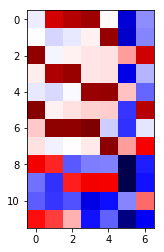

In [15]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic', interpolation='none');

**Flight distance histogram:**

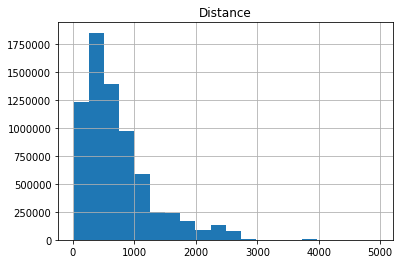

In [16]:
flights_df.hist('Distance', bins=20);

**Making a histogram of flight frequency by date.**

In [188]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(
    columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [189]:
flights_df

Year  Month  DayofMonth  DayOfWeek  DepTime UniqueCarrier  FlightNum  \
0        2008      1           3          4   2003.0            WN        335   
1        2008      1           3          4    754.0            WN       3231   
2        2008      1           3          4    628.0            WN        448   
3        2008      1           3          4    926.0            WN       1746   
4        2008      1           3          4   1829.0            WN       3920   
5        2008      1           3          4   1940.0            WN        378   
6        2008      1           3          4   1937.0            WN        509   
7        2008      1           3          4   1039.0            WN        535   
8        2008      1           3          4    617.0            WN         11   
9        2008      1           3          4   1620.0            WN        810   
10       2008      1           3          4    706.0            WN        100   
11       2008      1           3          4   1644.0            WN       1333   
12       2008      1           3          4   1426.0            WN        829   
13       2008      1           3          4    715.0            WN       1016   
14       2008      1           3          4   1702.0            WN       1827   
15       2008      1           3          4   1029.0            WN       2272   
16       2008      1           3          4   1452.0            WN        675   
17       2008      1           3          4    754.0            WN       1144   
18       2008      1           3          4   1323.0            WN          4   
19       2008      1           3          4   1416.0            WN         54   
20       2008      1           3          4    706.0            WN         68   
21       2008      1           3          4   1657.0            WN        623   
22       2008      1           3          4   1900.0            WN        717   
23       2008      1           3          4   1039.0            WN       1244   
24       2008      1           3          4    801.0            WN       2101   
25       2008      1           3          4   1520.0            WN       2553   
26       2008      1           3          4   1422.0            WN        188   
27       2008      1           3          4   1954.0            WN       1754   
28       2008      1           3          4    636.0            WN       2275   
29       2008      1           3          4    734.0            WN        550   
...       ...    ...         ...        ...      ...           ...        ...   
7009698  2008     12          13          6   1625.0            DL       1605   
7009699  2008     12          13          6   1254.0            DL       1609   
7009700  2008     12          13          6   1842.0            DL       1610   
7009701  2008     12          13          6   1528.0            DL       1611   
7009702  2008     12          13          6   1531.0            DL       1612   
7009703  2008     12          13          6   1910.0            DL       1612   
7009704  2008     12          13          6   1441.0            DL       1613   
7009705  2008     12          13          6    921.0            DL       1616   
7009706  2008     12          13          6   1435.0            DL       1618   
7009707  2008     12          13          6   1750.0            DL       1618   
7009708  2008     12          13          6    706.0            DL       1619   
7009709  2008     12          13          6   1552.0            DL       1620   
7009710  2008     12          13          6   1250.0            DL       1621   
7009711  2008     12          13          6   1033.0            DL       1622   
7009712  2008     12          13          6    840.0            DL       1624   
7009713  2008     12          13          6    810.0            DL       1625   
7009714  2008     12          13          6    547.0            DL       1627   
7009715  2008     12          13        

In [165]:
flights_df.groupby('Date').size()

Date
2008-01-01    19187
2008-01-02    20954
2008-01-03    20937
2008-01-04    20929
2008-01-05    18069
2008-01-06    19897
2008-01-07    20347
2008-01-08    19604
2008-01-09    19820
2008-01-10    20305
2008-01-11    20349
2008-01-12    16572
2008-01-13    18947
2008-01-14    20178
2008-01-15    19504
2008-01-16    19768
2008-01-17    20277
2008-01-18    20348
2008-01-19    16255
2008-01-20    18653
2008-01-21    20133
2008-01-22    19505
2008-01-23    19771
2008-01-24    20258
2008-01-25    20314
2008-01-26    16282
2008-01-27    18922
2008-01-28    20149
2008-01-29    19498
2008-01-30    19767
              ...  
2008-12-02    18166
2008-12-03    18019
2008-12-04    18350
2008-12-05    18405
2008-12-06    14440
2008-12-07    17116
2008-12-08    18301
2008-12-09    17600
2008-12-10    17917
2008-12-11    18377
2008-12-12    18433
2008-12-13    14459
2008-12-14    17137
2008-12-15    18317
2008-12-16    17631
2008-12-17    18294
2008-12-18    18746
2008-12-19    18828
2008-12-20    1

In [166]:
num_flights_by_date = flights_df.groupby('Date').size()

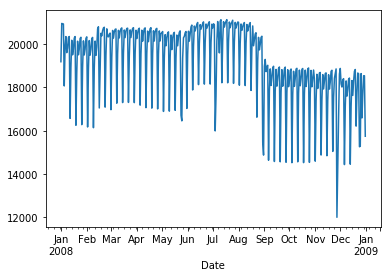

In [167]:
num_flights_by_date.plot();

**Do you see a weekly pattern above? And below?**

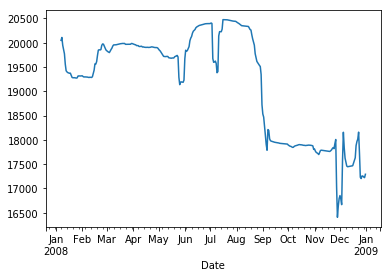

In [168]:
num_flights_by_date.rolling(window=7).mean().plot();

**We'll need a new column in our dataset - departure hour, let's create it.**

As we see, DepTime is distributed from 1 to 2400 (it is given in the hhmm format, check the [column description](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) again). We'll treat departure hour as DepTime // 100 (divide by 100 and apply the floor function). However, now we'll have both hour 0 and hour 24. Hour 24 sounds strange, we'll set it to be 0 instead (a typical imperfectness of real data, however, you can check that it affects only 521 rows, which is sort of not a big deal). So now values of a new column DepHour will be distributed from 0 to 23. There are some missing values, for now we won't fill in them, just ignore them.


In [169]:
flights_df['DepHour'] = flights_df['DepTime'] // 100
flights_df['DepHour'] .replace(to_replace = 24, value = 0, inplace = True)

In [170]:
flights_df['DepHour'].describe()

count    6873482.0
mean           NaN
std            0.0
min            0.0
25%            9.0
50%           13.0
75%           17.0
max           23.0
Name: DepHour, dtype: float64

### Now it's your turn. Answer the questions below.

**1. How many unique carriers are there in our dataset?**

In [34]:
flights_df['UniqueCarrier'].nunique()

20

**2. We have both cancelled and completed flights in the dataset. Check if there are more completed or cancelled flights. What is the difference?**

In [50]:
nonCancelled = flights_df['Cancelled'].value_counts()[0]
Cancelled = flights_df['Cancelled'].value_counts()[1]

print('{0} non cancelled flights, {1} cancelled flights'.format(nonCancelled, Cancelled))
print('Difference {0}'.format(nonCancelled - Cancelled))


6872294 non cancelled flights, 137434 cancelled flights
Difference 6734860


**3. Find a flight with the longest departure delay and a flight with the longest arrival delay. Do they have the same destination airport, and if yes, what is its code?**

In [130]:
flights_df.groupby(['Dest'])['ArrDelay','DepDelay'].agg({'ArrDelay':max,  'DepDelay': max}).sort_values(by=['ArrDelay','DepDelay'], ascending=False)


DepDelay  ArrDelay
Dest                    
MSP     2468.0    2460.0
DTW     1952.0    1951.0
DFW     1710.0    1707.0
MIA     1521.0    1525.0
MEM     1490.0    1490.0
ORD     1428.0    1417.0
LAX     1316.0    1325.0
STL     1316.0    1312.0
HNL     1268.0    1267.0
MQT     1198.0    1211.0
IND     1182.0    1203.0
SEA     1198.0    1202.0
LGA     1201.0    1195.0
ATL     1206.0    1175.0
GUC     1178.0    1170.0
MCO     1123.0    1166.0
XNA     1153.0    1129.0
JFK     1103.0    1098.0
PDX     1114.0    1090.0
OGG     1099.0    1081.0
GRB     1049.0    1058.0
CLE     1051.0    1029.0
DEN     1019.0    1026.0
CMH      996.0    1022.0
IAD     1036.0    1020.0
VPS      966.0    1019.0
EWR     1011.0    1017.0
GRR      963.0     984.0
BDL      995.0     980.0
MKE      951.0     969.0
...        ...       ...
AKN      228.0     215.0
MKG      210.0     208.0
SJT      162.0     208.0
PIH      179.0     199.0
CDC      197.0     198.0
SLE      175.0     194.0
MOT      199.0     189.0
ROW      165.0     188.0
SMX      325.0     187.0
LWB      166.0     176.0
INL      178.0     175.0
IPL      173.0     171.0
IYK      151.0     164.0
LWS      158.0     158.0
SUX      146.0     146.0
GST      146.0     137.0
RHI      127.0     134.0
PLN      124.0     128.0
WYS      140.0     127.0
YKM      110.0     118.0
DLG      114.0     116.0
BLI      100.0      98.0
ADK       96.0      97.0
BJI      106.0      96.0
HTS       85.0      80.0
ITH       71.0      79.0
PIR       30.0      31.0
TUP        9.0       6.0
CYS       11.0       NaN
OGD        8.0       NaN

[304 rows x 2 columns]

In [138]:
flights_df.groupby(['Dest'])['ArrDelay','DepDelay'].max().sort_values(by=['ArrDelay','DepDelay'], ascending=False)

ArrDelay  DepDelay
Dest                    
MSP     2460.0    2468.0
DTW     1951.0    1952.0
DFW     1707.0    1710.0
MIA     1525.0    1521.0
MEM     1490.0    1490.0
ORD     1417.0    1428.0
LAX     1325.0    1316.0
STL     1312.0    1316.0
HNL     1267.0    1268.0
MQT     1211.0    1198.0
IND     1203.0    1182.0
SEA     1202.0    1198.0
LGA     1195.0    1201.0
ATL     1175.0    1206.0
GUC     1170.0    1178.0
MCO     1166.0    1123.0
XNA     1129.0    1153.0
JFK     1098.0    1103.0
PDX     1090.0    1114.0
OGG     1081.0    1099.0
GRB     1058.0    1049.0
CLE     1029.0    1051.0
DEN     1026.0    1019.0
CMH     1022.0     996.0
IAD     1020.0    1036.0
VPS     1019.0     966.0
EWR     1017.0    1011.0
GRR      984.0     963.0
BDL      980.0     995.0
MKE      969.0     951.0
...        ...       ...
AKN      215.0     228.0
MKG      208.0     210.0
SJT      208.0     162.0
PIH      199.0     179.0
CDC      198.0     197.0
SLE      194.0     175.0
MOT      189.0     199.0
ROW      188.0     165.0
SMX      187.0     325.0
LWB      176.0     166.0
INL      175.0     178.0
IPL      171.0     173.0
IYK      164.0     151.0
LWS      158.0     158.0
SUX      146.0     146.0
GST      137.0     146.0
RHI      134.0     127.0
PLN      128.0     124.0
WYS      127.0     140.0
YKM      118.0     110.0
DLG      116.0     114.0
BLI       98.0     100.0
ADK       97.0      96.0
BJI       96.0     106.0
HTS       80.0      85.0
ITH       79.0      71.0
PIR       31.0      30.0
TUP        6.0       9.0
CYS        NaN      11.0
OGD        NaN       8.0

[304 rows x 2 columns]

- yes, MSP

**4. Find the carrier that has the greatest number of cancelled flights.**

In [153]:
##With sum we only take account the cancelled flights
flights_df.groupby(['UniqueCarrier'])['Cancelled'].sum().sort_values(ascending = False)

UniqueCarrier
MQ    18331.0
AA    17440.0
OO    12436.0
WN    12389.0
UA    10541.0
XE     9992.0
YV     9219.0
9E     7100.0
DL     6813.0
US     6582.0
OH     6462.0
EV     5026.0
CO     3702.0
B6     3205.0
NW     2906.0
FL     2236.0
AS     2139.0
HA      570.0
F9      303.0
AQ       42.0
Name: Cancelled, dtype: float64

In [149]:
flights_df.groupby(['UniqueCarrier'])['Cancelled'].value_counts().sort_values(ascending = False)

UniqueCarrier  Cancelled
WN             0            1189365
AA             0             587445
OO             0             554723
MQ             0             472362
US             0             447007
DL             0             445118
UA             0             438974
XE             0             364518
NW             0             344746
CO             0             294753
EV             0             275549
FL             0             259448
9E             0             255108
YV             0             245711
B6             0             192886
OH             0             191145
AS             0             148963
F9             0              95459
HA             0              61256
MQ             1              18331
AA             1              17440
OO             1              12436
WN             1              12389
UA             1              10541
XE             1               9992
YV             1               9219
AQ             0               7758
9E 

**- MQ**

In [171]:
sns.countplot(x='DepHour', data=flights_df);

In [178]:
flights_df['DepHour'].value_counts().sort_values(ascending = False)*100/flights_df.shape[0]

8.0     6.408580
6.0     6.373100
11.0    6.344069
7.0     6.229914
13.0    6.218743
9.0     6.203522
16.0    6.191638
17.0    6.169826
10.0    6.155160
12.0    6.052289
14.0    5.947092
15.0    5.865078
18.0    5.717540
19.0    5.525008
20.0    4.079916
21.0    3.635662
5.0     2.113734
22.0    1.706928
23.0    0.657700
0.0     0.290568
1.0     0.083612
4.0     0.048361
2.0     0.026406
3.0     0.011883
Name: DepHour, dtype: float64

In [164]:
flights_df['DepHour'].mean()

nan

- 8 am

**6. OK, now let's examine cancelled flight distribution by time. Which hour has the least percentage of cancelled flights?**

In [179]:


sns.countplot(x='DepHour', hue='Cancelled', data=flights_df);



In [173]:
pd.crosstab(flights_df['DepHour'], flights_df['Cancelled'])

Cancelled       0   1
DepHour              
0.0         20361   7
1.0          5857   4
2.0          1850   1
3.0           833   0
4.0          3389   1
5.0        148143  24
6.0        446657  80
7.0        436617  83
8.0        449145  79
9.0        434794  56
10.0       431403  57
11.0       444643  59
12.0       424196  53
13.0       435870  47
14.0       416818  57
15.0       411053  73
16.0       433944  73
17.0       432415  73
18.0       400718  66
19.0       387207  81
20.0       285940  51
21.0       254768  82
22.0       119594  57
23.0        46079  24

In [172]:
flights_df.groupby('DepHour')['Cancelled'].mean()*100

DepHour
0.0     0.034368
1.0     0.068248
2.0     0.054025
3.0     0.000000
4.0     0.029499
5.0     0.016198
6.0     0.017908
7.0     0.019006
8.0     0.017586
9.0     0.012878
10.0    0.013211
11.0    0.013267
12.0    0.012493
13.0    0.010782
14.0    0.013673
15.0    0.017756
16.0    0.016820
17.0    0.016879
18.0    0.016468
19.0    0.020915
20.0    0.017833
21.0    0.032176
22.0    0.047639
23.0    0.052057
Name: Cancelled, dtype: float64

**- 2 am**

**7. Is there any hour that didn't have any cancelled flights at all? Check all that apply.**

In [186]:
pd.crosstab(flights_df['DepHour'], flights_df['Cancelled'])

Cancelled       0   1
DepHour              
0.0         20361   7
1.0          5857   4
2.0          1850   1
3.0           833   0
4.0          3389   1
5.0        148143  24
6.0        446657  80
7.0        436617  83
8.0        449145  79
9.0        434794  56
10.0       431403  57
11.0       444643  59
12.0       424196  53
13.0       435870  47
14.0       416818  57
15.0       411053  73
16.0       433944  73
17.0       432415  73
18.0       400718  66
19.0       387207  81
20.0       285940  51
21.0       254768  82
22.0       119594  57
23.0        46079  24

**- 3**

**8. Find the busiest hour, or in other words, the hour when the number of departed flights reaches its maximum.**

Hint: Consider only completed flights.

**- 8**

**9. Since we know the departure hour, it might be interesting to examine the average delay for corresponding hour. Are there any cases, when the planes on average departed earlier than they should have done? And if yes, at what departure hours did it happen?**]

In [191]:
flights_df[flights_df['Cancelled'] == 0].groupby('DepHour')['DepDelay'].mean()

DepHour
0.0      70.750000
1.0     111.812500
2.0     122.562500
3.0      95.812500
4.0       3.375000
5.0      -4.253906
6.0      -1.629883
7.0       0.102539
8.0       1.760742
9.0       3.753906
10.0      5.460938
11.0      6.683594
12.0      7.902344
13.0      8.812500
14.0     10.351562
15.0     11.875000
16.0     11.882812
17.0     13.210938
18.0     15.343750
19.0     16.875000
20.0     22.781250
21.0     23.031250
22.0     38.031250
23.0     60.000000
Name: DepDelay, dtype: float16

**- yes, at 5-6 am**

**10. Considering only the completed flights by the carrier, that you have found in Question 4, find the distribution of these flights by hour. At what time does the greatest number of its planes depart?**

In [34]:
flights_df[flights_df['Cancelled'] == 0].groupby('UniqueCarrier')['DepHour'].value_counts().sort_values(
    ascending=False)

UniqueCarrier  DepHour
WN             6.0        84683
               7.0        84075
               10.0       76702
               8.0        75914
               18.0       74958
               9.0        74869
               17.0       74171
               19.0       73836
               12.0       73667
               11.0       73343
               16.0       71450
               14.0       71226
               15.0       71170
               13.0       71116
               20.0       67041
               21.0       50421
AA             7.0        41080
               8.0        40000
OO             16.0       39768
               13.0       39412
UA             8.0        39124
AA             12.0       38676
OO             11.0       38352
AA             15.0       38338
               11.0       37773
               14.0       37602
               13.0       37353
               9.0        37270
OO             10.0       37213
AA             17.0       36634
                 

**- at 7 am**

In [37]:
flights_df[flights_df['Cancelled'] == 0].groupby('UniqueCarrier')['DepHour'].count()


UniqueCarrier
9E     255108
AA     587445
AQ       7758
AS     148963
B6     192886
CO     294753
DL     445118
EV     275549
F9      95459
FL     259448
HA      61256
MQ     472362
NW     344746
OH     191145
OO     554723
UA     438974
US     447007
WN    1189365
XE     364518
YV     245711
Name: DepHour, dtype: int64

**- OO**

**12. Plot distributions of flight cancellation reasons (CancellationCode).**

**What is the most frequent reason for flight cancellation? (Use this [link](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) to translate codes into reasons)**

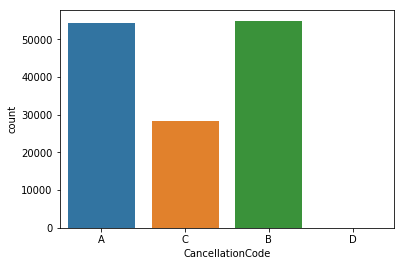

In [39]:
sns.countplot(x='CancellationCode', data=flights_df)

In [40]:
flights_df.CancellationCode.value_counts()

B    54904
A    54330
C    28188
D       12
Name: CancellationCode, dtype: int64

**- Weather conditions**

**13. Which route is the most frequent, in terms of the number of flights?**

(Take a look at 'Origin' and 'Dest' features. Consider A->B and B->A directions as different routes)

In [42]:
pd.crosstab(flights_df[ 'Origin'], flights_df['Dest' ])

Dest    ABE  ABI   ABQ   ABY  ACK  ACT  ACV  ACY  ADK  ADQ ...   TYR   TYS  \
Origin                                                     ...               
ABE       0    0     0     0    0    0    0    0    0    0 ...     0     0   
ABI       0    0     0     0    0    0    0    0    0    0 ...     0     0   
ABQ       0    0     0     0    0    0    0    0    0    0 ...     0     0   
ABY       0    0     0     0    0    0    0    0    0    0 ...     0     0   
ACK       0    0     0     0    0    0    0    0    0    0 ...     0     0   
ACT       0    0     0     0    0    0    0    0    0    0 ...     0     0   
ACV       0    0     0     0    0    0    0    0    0    0 ...     0     0   
ACY       0    0     0     0    0    0    0    0    0    0 ...     0     0   
ADK       0    0     0     0    0    0    0    0    0    0 ...     0     0   
ADQ       0    0     0     0    0    0    0    0    0    0 ...     0     0   
AEX       0    0     0     0    0    0    0    0    0    0 ...     0     0   
AGS       0    0     0     0    0    0    0    0    0    0 ...     0     0   
AKN       0    0     0     0    0    0    0    0    0    0 ...     0     0   
ALB       0    0     0     0    0    0    0    0    0    0 ...     0     0   
ALO       0    0     0     0    0    0    0    0    0    0 ...     0     0   
AMA       0    0   366     0    0    0    0    0    0    0 ...     0     0   
ANC       0    0     0     0    0    0    0    0  102  706 ...     0     0   
ASE       0    0     0     0    0    0    0    0    0    0 ...     0     0   
ATL     852    0  1064  1095    0    0    0  113    0    0 ...     0  2428   
ATW       0    0     0     0    0    0    0    0    0    0 ...     0     0   
AUS       0    0   435     0    0    0    0    0    0    0 ...     0     0   
AVL       0    0     0     0    0    0    0    0    0    0 ...     0     0   
AVP       0    0     0     0    0    0    0    0    0    0 ...     0     0   
AZO       0    0     0     0    0    0    0    0    0    0 ...     0     0   
BDL       0    0     0     0    0    0    0    0    0    0 ...     0     0   
BET       0    0     0     0    0    0    0    0    0    0 ...     0     0   
BFL       0    0     0     0    0    0    0    0    0    0 ...     0     0   
BGM       0    0     0     0    0    0    0    0    0    0 ...     0     0   
BGR       0    0     0     0    0    0    0    0    0    0 ...     0     0   
BHM       0    0     0     0    0    0    0    0    0    0 ...     0     0   
...     ...  ...   ...   ...  ...  ...  ...  ...  ...  ... ...   ...   ...   
SPS       0    0     0     0    0    0    0    0    0    0 ...     0     0   
SRQ       0    0     0     0    0    0    0    0    0    0 ...     0     0   
STL       0    0   366     0    0    0    0    0    0    0 ...     0     0   
STT       0    0     0     0    0    0    0    0    0    0 ...     0     0   
STX       0    0     0     0    0    0    0    0    0    0 ...     0     0   
SUN       0    0     0     0    0    0    0    0    0    0 ...     0     0   
SUX       0    0     0     0    0    0    0    0    0    0 ...     0     0   
SWF       0    0     0     0    0    0    0    0    0    0 ...     0     0   
SYR       0    0     0     0    0    0    0    0    0    0 ...     0     0   
TEX       0    0     0     0    0    0    0    0    0    0 ...     0     0   
TLH       0    0     0     0    0    0    0    0    0    0 ...     0     0   
TOL       0    0     0     0    0    0    0    0    0    0 ...     0     0   
TPA       0    0   366     0    0    0    0    0    0    0 ...     0     0   
TRI       0    0     0     0    0    0    0    0    0    0 ...     0     0   
TUL       0    0   229     0    0    0    0    0    0    0 ...     0     0   
TUP       0    0     0     0    0    0    0    0    0    0 ...     0     0   
TUS       0    0   718     0    0    0    0    0    0    0 ...     0     0   
TVC       0    0     0     0    0    0    0    0    0    0 ...     0     0   
TWF       0    0     0

In [49]:
flights_df.groupby('Origin')['Dest'].value_counts().sort_values(ascending=False)

Origin  Dest
SFO     LAX     13788
LAX     SFO     13390
OGG     HNL     12383
LGA     BOS     12035
BOS     LGA     12029
HNL     OGG     12014
LAX     LAS     11773
LAS     LAX     11729
LAX     SAN     11257
SAN     LAX     11224
DCA     LGA     11102
LGA     DCA     11063
        ORD     10862
ORD     LGA     10770
HNL     LIH     10769
LAS     PHX     10626
LGA     ATL     10507
ATL     LGA     10506
LIH     HNL     10407
PHX     LAS     10337
        LAX      9992
LAX     PHX      9897
DFW     ATL      9849
ATL     DFW      9847
DAL     HOU      9790
HOU     DAL      9766
ORD     MSP      9688
ATL     MCO      9613
MCO     ATL      9611
MSP     ORD      9356
                ...  
BWI     GRR         1
OMA     DSM         1
BTR     MSY         1
PIT     SJU         1
        GRB         1
PIA     LNK         1
        HPN         1
BOS     ACK         1
        BTV         1
        GGG         1
PHL     ICT         1
        GRR         1
        AVP         1
        ATW        

In [61]:
flights_df.loc[flights_df.Origin == 'SFO'][flights_df.Dest == 'LAX'].count()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Year                 13788
Month                13788
DayofMonth           13788
DayOfWeek            13788
DepTime              13299
UniqueCarrier        13788
FlightNum            13788
ArrDelay             13285
DepDelay             13299
Origin               13788
Dest                 13788
Distance             13788
Cancelled            13788
CancellationCode       489
CarrierDelay          3142
WeatherDelay          3142
NASDelay              3142
SecurityDelay         3142
LateAircraftDelay     3142
Date                 13788
DepHour              13299
dtype: int64

**- San-Francisco – Los-Angeles (SFO-LAX)**

**14. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

*Hint: consider only positive delays*

In [248]:
flights_df.groupby(['Origin', 'Dest'])['WeatherDelay','DepDelay'].count().sort_values('DepDelay',ascending=False)

WeatherDelay  DepDelay
Origin Dest                        
SFO    LAX           3142     13299
LAX    SFO           3571     12935
OGG    HNL           1042     12138
HNL    OGG           1013     11779
LAX    LAS           2038     11562
LAS    LAX           2502     11508
LGA    BOS           1850     11226
BOS    LGA           2389     11218
LAX    SAN           1173     11144
SAN    LAX           1315     11053
HNL    LIH            888     10703
DCA    LGA           2252     10340
LIH    HNL            857     10332
LGA    DCA           1642     10313
LAS    PHX           1773     10306
PHX    LAS           2424     10115
ATL    LGA           3519     10097
LGA    ATL           3048     10073
       ORD           3483     10019
ORD    LGA           3828      9948
PHX    LAX           1982      9839
LAX    PHX           1649      9715
ATL    DFW           2519      9649
DFW    ATL           2369      9646
ATL    MCO           2301      9581
MCO    ATL           1997      9562
DAL    HOU           2081      9350
ORD    MSP           2410      9296
HOU    DAL           2156      9259
SLC    DEN           1615      9221
...                   ...       ...
BNA    COS              0         1
SJC    FAT              0         1
ONT    GJT              0         1
BFL    FAT              0         1
SJC    BFL              1         1
SGU    TWF              0         1
BGR    BTV              1         1
SGU    PSP              0         1
       PIH              0         1
       CDC              0         1
SGF    FSD              0         1
MKE    BHM              0         1
       AVP              0         1
SGF    BNA              1         1
MKE    ABE              0         1
BHM    AUS              1         1
BNA    CID              1         1
LEX    COS              1         1
BHM    HSV              0         1
DEN    ROC              0         1
BHM    JFK              1         1
ONT    SAN              1         1
LEX    DAY              0         1
BHM    MKE              0         1
DEN    PIH              0         1
BIL    GTF              0         1
SFO    IDA              0         1
FSD    MSN              0         1
IAD    DCA              1         1
DEN    MBS              0         1

[5356 rows x 2 columns]

In [253]:
flights_df.groupby(['Origin', 'Dest'])['DepDelay'].value_counts().sort_values(ascending=False)

Origin  Dest  DepDelay
SAN     LAX   -5.0        1866
LGA     BOS   -2.0        1854
DCA     LGA   -2.0        1787
LGA     DCA   -2.0        1766
BOS     LGA   -2.0        1720
LGA     BOS   -1.0        1587
HNL     OGG   -5.0        1499
DAL     HOU    0.0        1449
HNL     LIH   -5.0        1441
LAX     SAN   -4.0        1428
              -5.0        1427
LGA     DCA   -1.0        1387
LIH     HNL   -5.0        1362
OGG     HNL   -5.0        1340
LAX     SAN   -3.0        1330
MCO     ATL   -5.0        1304
DCA     LGA   -3.0        1297
BOS     DCA   -5.0        1275
HOU     DAL    0.0        1271
HNL     LIH    0.0        1251
        OGG    0.0        1245
MCO     ATL   -4.0        1199
BOS     LGA   -1.0        1181
              -3.0        1178
HNL     OGG   -3.0        1178
LAX     SAN   -2.0        1148
HNL     OGG   -4.0        1136
KOA     HNL   -5.0        1129
SFO     LAX   -4.0        1119
              -3.0        1108
                          ... 
MSP     BGR    0

In [252]:
flights_df.groupby(['Origin', 'Dest'])['WeatherDelay'].value_counts().sort_values(ascending=False)

Origin  Dest  WeatherDelay
ORD     LGA   0.0             3562
LAX     SFO   0.0             3462
ATL     LGA   0.0             3434
LGA     ORD   0.0             3328
SFO     LAX   0.0             3111
LGA     ATL   0.0             2921
ATL     EWR   0.0             2667
ORD     EWR   0.0             2569
EWR     ORD   0.0             2517
        ATL   0.0             2517
DFW     ORD   0.0             2497
LAS     LAX   0.0             2437
JFK     LAX   0.0             2392
PHX     LAS   0.0             2369
ATL     DFW   0.0             2334
BOS     LGA   0.0             2317
DFW     ATL   0.0             2250
JFK     SFO   0.0             2237
DCA     LGA   0.0             2210
ATL     MCO   0.0             2209
CLT     EWR   0.0             2186
LAX     JFK   0.0             2179
DEN     LAX   0.0             2168
SFO     JFK   0.0             2157
ORD     LAX   0.0             2156
ATL     ORD   0.0             2133
LAX     ORD   0.0             2119
MSP     ORD   0.0           

In [254]:
flights_df[(flights_df['DepDelay']>0) & (flights_df['WeatherDelay']>0)].groupby(['Origin', 'Dest'])['WeatherDelay','DepDelay'].count().sort_values('DepDelay',ascending=False)

WeatherDelay  DepDelay
Origin Dest                        
DTW    LGA            435       435
ORD    DFW            418       418
       CVG            383       383
       MSP            371       371
DTW    ORD            370       370
MIA    EWR            368       368
DTW    EWR            318       318
ORD    DTW            303       303
MSP    LGA            301       301
ORD    LAX            294       294
       LGA            266       266
MSP    ORD            265       265
ORD    DCA            250       250
       MIA            238       238
       ATL            236       236
       CMH            236       236
SFO    EWR            232       232
PHL    BOS            229       229
ORD    BOS            226       226
       DEN            215       215
       EWR            213       213
MSP    EWR            211       211
ORD    SFO            208       208
LGA    RDU            208       208
ORD    IAH            203       203
BOS    DCA            202       202
JFK    BOS            200       200
ORD    PHL            196       196
       PHX            194       194
       SEA            193       193
...                   ...       ...
ELP    DEN              1         1
       ATL              1         1
       ABQ              1         1
SEA    LIH              1         1
ORF    MSP              1         1
EGE    ATL              1         1
MSP    PWM              1         1
SEA    SIT              1         1
ORF    LAS              1         1
MSP    ROC              1         1
EWR    SJC              1         1
SEA    AUS              1         1
SBA    DFW              1         1
FAT    LGB              1         1
FNT    TPA              1         1
       LAS              1         1
MSP    LIT              1         1
       LNK              1         1
FLL    SLC              1         1
SBP    SLC              1         1
SCC    ANC              1         1
SDF    BHM              1         1
FLL    AUS              1         1
FCA    MSP              1         1
       DEN              1         1
FAY    CLT              1         1
SDF    TPA              1         1
FAT    SBA              1         1
       MRY              1         1
ORD    GTF              1         1

[4416 rows x 2 columns]

**15. Examine the hourly distribution of departure times. Choose all correct statements:**

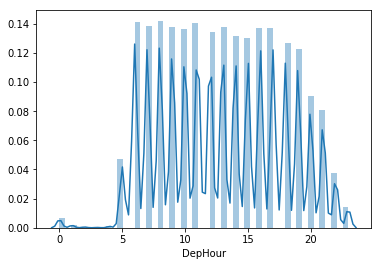

In [175]:


sns.distplot(flights_df['DepHour'].fillna(0.0).astype(int));

         Year  Month  DayofMonth  DayOfWeek  DepTime UniqueCarrier  FlightNum  \
178      2008      1           3          4      NaN            WN        126   
373      2008      1           3          4      NaN            WN       1146   
399      2008      1           3          4      NaN            WN        469   
401      2008      1           3          4      NaN            WN        618   
415      2008      1           3          4      NaN            WN       2528   
676      2008      1           3          4      NaN            WN        437   
686      2008      1           3          4      NaN            WN        934   
727      2008      1           3          4      NaN            WN       3326   
881      2008      1           3          4      NaN            WN       1402   
884      2008      1           3          4      NaN            WN       2205   
974      2008      1           3          4      NaN            WN       1219   
977      2008      1        

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


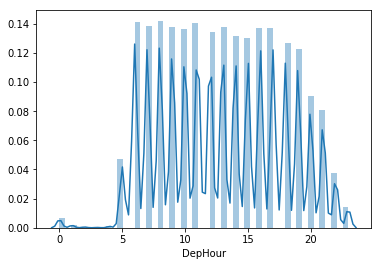

In [174]:
print(flights_df[flights_df['DepHour'].isnull()])
flights_df['DepHour'] = pd.to_numeric(flights_df['DepHour'], errors='coerce')
flights_df = flights_df.dropna(subset=['DepHour'])
flights_df['DepHour'] = flights_df['DepHour'].astype(int)
sns.distplot(flights_df['DepHour']);

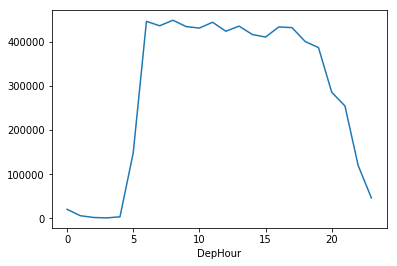

In [180]:
flights_by_hour = flights_df.groupby('DepHour').size()
flights_by_hour.plot();

**Flights are uniformly distributed within time interval [0-23].**

**In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.**


**16. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

Hint: Look for official meteorological winter months for the Northern Hemisphere.

Choose all correct statements:


In [196]:
num_flights_by_month = flights_df.groupby('Month').size()


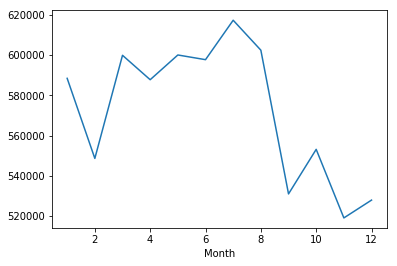

In [197]:
num_flights_by_month.plot();

In [190]:
flights_by_day = flights_df.groupby('DayofMonth').size()


In [191]:
flights_by_day.plot()

In [193]:
flights_by_week = flights_df.groupby('DayOfWeek').size()

In [194]:
flights_by_week.plot()

The number of flights during weekends is less than during weekdays (working days). 

There are less flights during winter (the months of December, January and February) than during summer (June, July, and August).

**17. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**

**Choose all correct statements:**

In [201]:
pd.crosstab(flights_df.Month, flights_df.Cancelled)

Cancelled       0    1
Month                 
1          588457    0
2          548640    0
3          599907    0
4          587771    0
5          600064    0
6          597734    0
7          617333    0
8          602444    0
9          530995    0
10         552956  190
11         518814  251
12         527179  747

In [200]:
pd.crosstab(flights_df.Month, flights_df.CancellationCode)

CancellationCode    A    B   C
Month                         
10                118   56  16
11                151   78  22
12                305  364  78

In [198]:
sns.countplot(x= 'Month',  hue='CancellationCode', data = flights_df);

October has the lowest number of cancellations due to weather. 

**18. Which month has the greatest number of cancellations due to Carrier?**

    May
    January
    September
    April



In [218]:
flights_df[flights_df['CancellationCode'] == 'A'].groupby(['Month', 'UniqueCarrier'])['Cancelled'].size().sort_values(
    ascending=False)

Month  UniqueCarrier
12     9E               34
       OO               33
       UA               31
       AA               28
       CO               26
       EV               26
       YV               24
       US               23
11     UA               21
12     MQ               18
11     AA               17
12     DL               17
11     US               17
10     YV               16
11     9E               15
       YV               15
10     AA               14
       9E               14
11     OO               13
10     UA               13
11     MQ               12
10     US               11
       OO               11
11     DL               11
12     OH               10
10     MQ               10
       DL                9
11     EV                8
12     WN                8
       XE                6
       NW                6
10     B6                5
12     B6                5
11     WN                5
10     EV                4
11     B6                4
12     

**9E**

**20. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay'). (Boxplots can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile).**

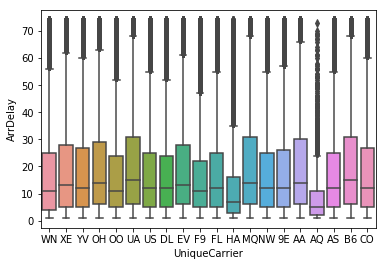

In [224]:
sns.boxplot(x ='UniqueCarrier', y ='ArrDelay',  data= flights_df[(flights_df['ArrDelay'] > 0) & (flights_df['ArrDelay'] < flights_df['ArrDelay'].quantile(.95))]);

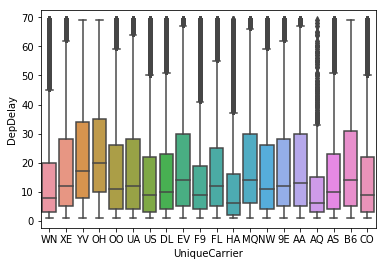

In [225]:
sns.boxplot(x ='UniqueCarrier', y ='DepDelay',  data= flights_df[(flights_df['DepDelay'] > 0) & (flights_df['DepDelay'] < flights_df['DepDelay'].quantile(.95))]);

In [235]:
flights_df[(flights_df['DepDelay'] > 0) & (flights_df['DepDelay'] < flights_df['DepDelay'].quantile(.95))].groupby('UniqueCarrier')['DepDelay'].median().sort_values(
    ascending=False)

UniqueCarrier
OH    20.0
YV    17.0
MQ    14.0
B6    14.0
EV    14.0
AA    13.0
XE    12.0
FL    12.0
UA    12.0
9E    12.0
NW    11.0
OO    11.0
DL    10.0
AS    10.0
F9     9.0
CO     9.0
US     9.0
WN     8.0
HA     6.0
AQ     6.0
Name: DepDelay, dtype: float16

In [236]:
flights_df[(flights_df['ArrDelay'] > 0) & (flights_df['ArrDelay'] < flights_df['ArrDelay'].quantile(.95))].groupby('UniqueCarrier')['ArrDelay'].median().sort_values(
    ascending=False)

UniqueCarrier
UA    15.0
B6    15.0
AA    14.0
OH    14.0
MQ    14.0
EV    13.0
XE    13.0
YV    12.0
AS    12.0
CO    12.0
DL    12.0
FL    12.0
NW    12.0
US    12.0
9E    12.0
F9    11.0
OO    11.0
WN    11.0
HA     7.0
AQ     5.0
Name: ArrDelay, dtype: float16

**- AQ**